In [1]:
future_days = 1
horizon = int(96*future_days)

## Import the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
utility_data=pd.read_csv('weatherkit_plus_load.csv')

In [4]:
utility_data.event_timestamp = utility_data.event_timestamp.apply(pd.to_datetime)

In [5]:
utility_data.head()

event_timestamp  weatherkit_observed_temperature_C  \
0 2023-02-11 00:30:00+05:30                              22.21   
1 2023-02-11 00:45:00+05:30                              22.25   
2 2023-02-11 01:00:00+05:30                              22.10   
3 2023-02-11 01:15:00+05:30                              21.95   
4 2023-02-11 01:30:00+05:30                              21.80   

   weatherkit_observed_humidity_pc  weatherkit_observed_air_pressure_kPa  \
0                             70.0                               101.357   
1                             69.0                               101.354   
2                             70.0                               101.344   
3                             70.0                               101.333   
4                             70.0                               101.322   

   weatherkit_observed_cloud_cover_pc  weatherkit_observed_wind_direction_deg  \
0                                 0.0                                   359.0   
1                                 0.0                                     2.0   
2                                 0.0                                     4.0   
3                                 0.0                                     6.0   
4                                 0.0                                     8.0   

   weatherkit_observed_wind_speed_km_h  weatherkit_forecast_temp_C  \
0                                 7.19                       21.99   
1                                 7.25                       21.99   
2                                 7.21                       21.99   
3                                 7.15                       21.99   
4                                 7.09                       21.35   

   weatherkit_forecast_humidity_pc  weatherkit_forecast_air_pressure_kPa  \
0                             72.0                               101.369   
1                             72.0                               101.369   
2                             72.0                               101.369   
3                             72.0                               101.369   
4                             73.0                               101.334   

   weatherkit_forecast_cloud_cover_pc  weatherkit_forecast_wind_direction_deg  \
0                                 0.0                                     1.0   
1                                 0.0                                     1.0   
2                                 0.0                                     1.0   
3                                 0.0                                     1.0   
4                                 0.0                                     6.0   

   weatherkit_forecast_wind_speed_km_h     load_MW  
0                                 7.06  256.024088  
1                                 7.06  251.899132  
2                                 7.06  248.695780  
3                                 7.06  245.879308  
4                                 7.37  243.583376

In [6]:
observed_vars = [col for col in utility_data.columns if 'observed' in col]
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [7]:
forecast_vars = [col for col in utility_data.columns if 'forecast' in col] # or 'ts_' in col)]
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [8]:
target_var = 'load_MW'

In [9]:
utility_data.event_timestamp.max()

Timestamp('2023-07-10 17:00:00+0530', tz='pytz.FixedOffset(330)')

In [10]:
# shifting the forecast data by one day so that they are available for model training
utility_data.loc[:,forecast_vars] = utility_data[forecast_vars].shift(-95)
utility_data=utility_data.dropna()

In [11]:
utility_data.event_timestamp.min()

Timestamp('2023-02-11 00:30:00+0530', tz='pytz.FixedOffset(330)')

In [12]:
utility_data.event_timestamp.max()

Timestamp('2023-07-09 17:00:00+0530', tz='pytz.FixedOffset(330)')

In [13]:
utility_data['ts_month_of_year'] = utility_data.event_timestamp.apply(lambda x : x.month)

In [14]:
utility_data['ts_day_of_month'] = utility_data.event_timestamp.apply(lambda x : x.day)

In [15]:
utility_data['ts_day_of_week'] = utility_data.event_timestamp.apply(lambda x : x.dayofweek)

In [16]:
utility_data['ts_hour_of_day'] = utility_data.event_timestamp.apply(lambda x : x.hour)

In [17]:
utility_data['ts_minute_of_hour'] = utility_data.event_timestamp.apply(lambda x : x.minute)

In [18]:
ts_vars = [col for col in utility_data.columns if 'ts_' in col]
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [19]:
utility_data.shape

(14203, 19)

In [20]:
utility_data

event_timestamp  weatherkit_observed_temperature_C  \
0     2023-02-11 00:30:00+05:30                              22.21   
1     2023-02-11 00:45:00+05:30                              22.25   
2     2023-02-11 01:00:00+05:30                              22.10   
3     2023-02-11 01:15:00+05:30                              21.95   
4     2023-02-11 01:30:00+05:30                              21.80   
...                         ...                                ...   
14198 2023-07-09 16:00:00+05:30                              29.90   
14199 2023-07-09 16:15:00+05:30                              29.79   
14200 2023-07-09 16:30:00+05:30                              29.88   
14201 2023-07-09 16:45:00+05:30                              29.75   
14202 2023-07-09 17:00:00+05:30                              29.59   

       weatherkit_observed_humidity_pc  weatherkit_observed_air_pressure_kPa  \
0                                 70.0                               101.357   
1                                 69.0                               101.354   
2                                 70.0                               101.344   
3                                 70.0                               101.333   
4                                 70.0                               101.322   
...                                ...                                   ...   
14198                             75.0                               100.506   
14199                             75.0                               100.498   
14200                             77.0                               100.490   
14201                             77.0                               100.487   
14202                             78.0                               100.487   

       weatherkit_observed_cloud_cover_pc  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
14198                                71.0   
14199                                72.0   
14200                                74.0   
14201                                76.0   
14202                                77.0   

       weatherkit_observed_wind_direction_deg  \
0                                       359.0   
1                                         2.0   
2                                         4.0   
3                                         6.0   
4                                         8.0   
...                                       ...   
14198                                   231.0   
14199                                   232.0   
14200                                   231.0   
14201                                   231.0   
14202                                   232.0   

       weatherkit_observed_wind_speed_km_h  weatherkit_forecast_temp_C  \
0                                     7.19                       23.26   
1                                     7.25                       21.36   
2                                     7.21                       21.36   
3                                     7.15                       21.36   
4                                     7.09                       21.36   
...                                    ...                         ...   
14198                                21.60                       30.61   
14199                                21.80                       30.61   
14200                                21.48                       30.15   
14201                                21.37                       30.15   
14202                                21.27                       30.15   

       weatherkit_forecast_humidity_pc  weatherkit_forecast_air_pressure_kPa  \
0                               52.000                               101.421   
1                               57.

## EDA

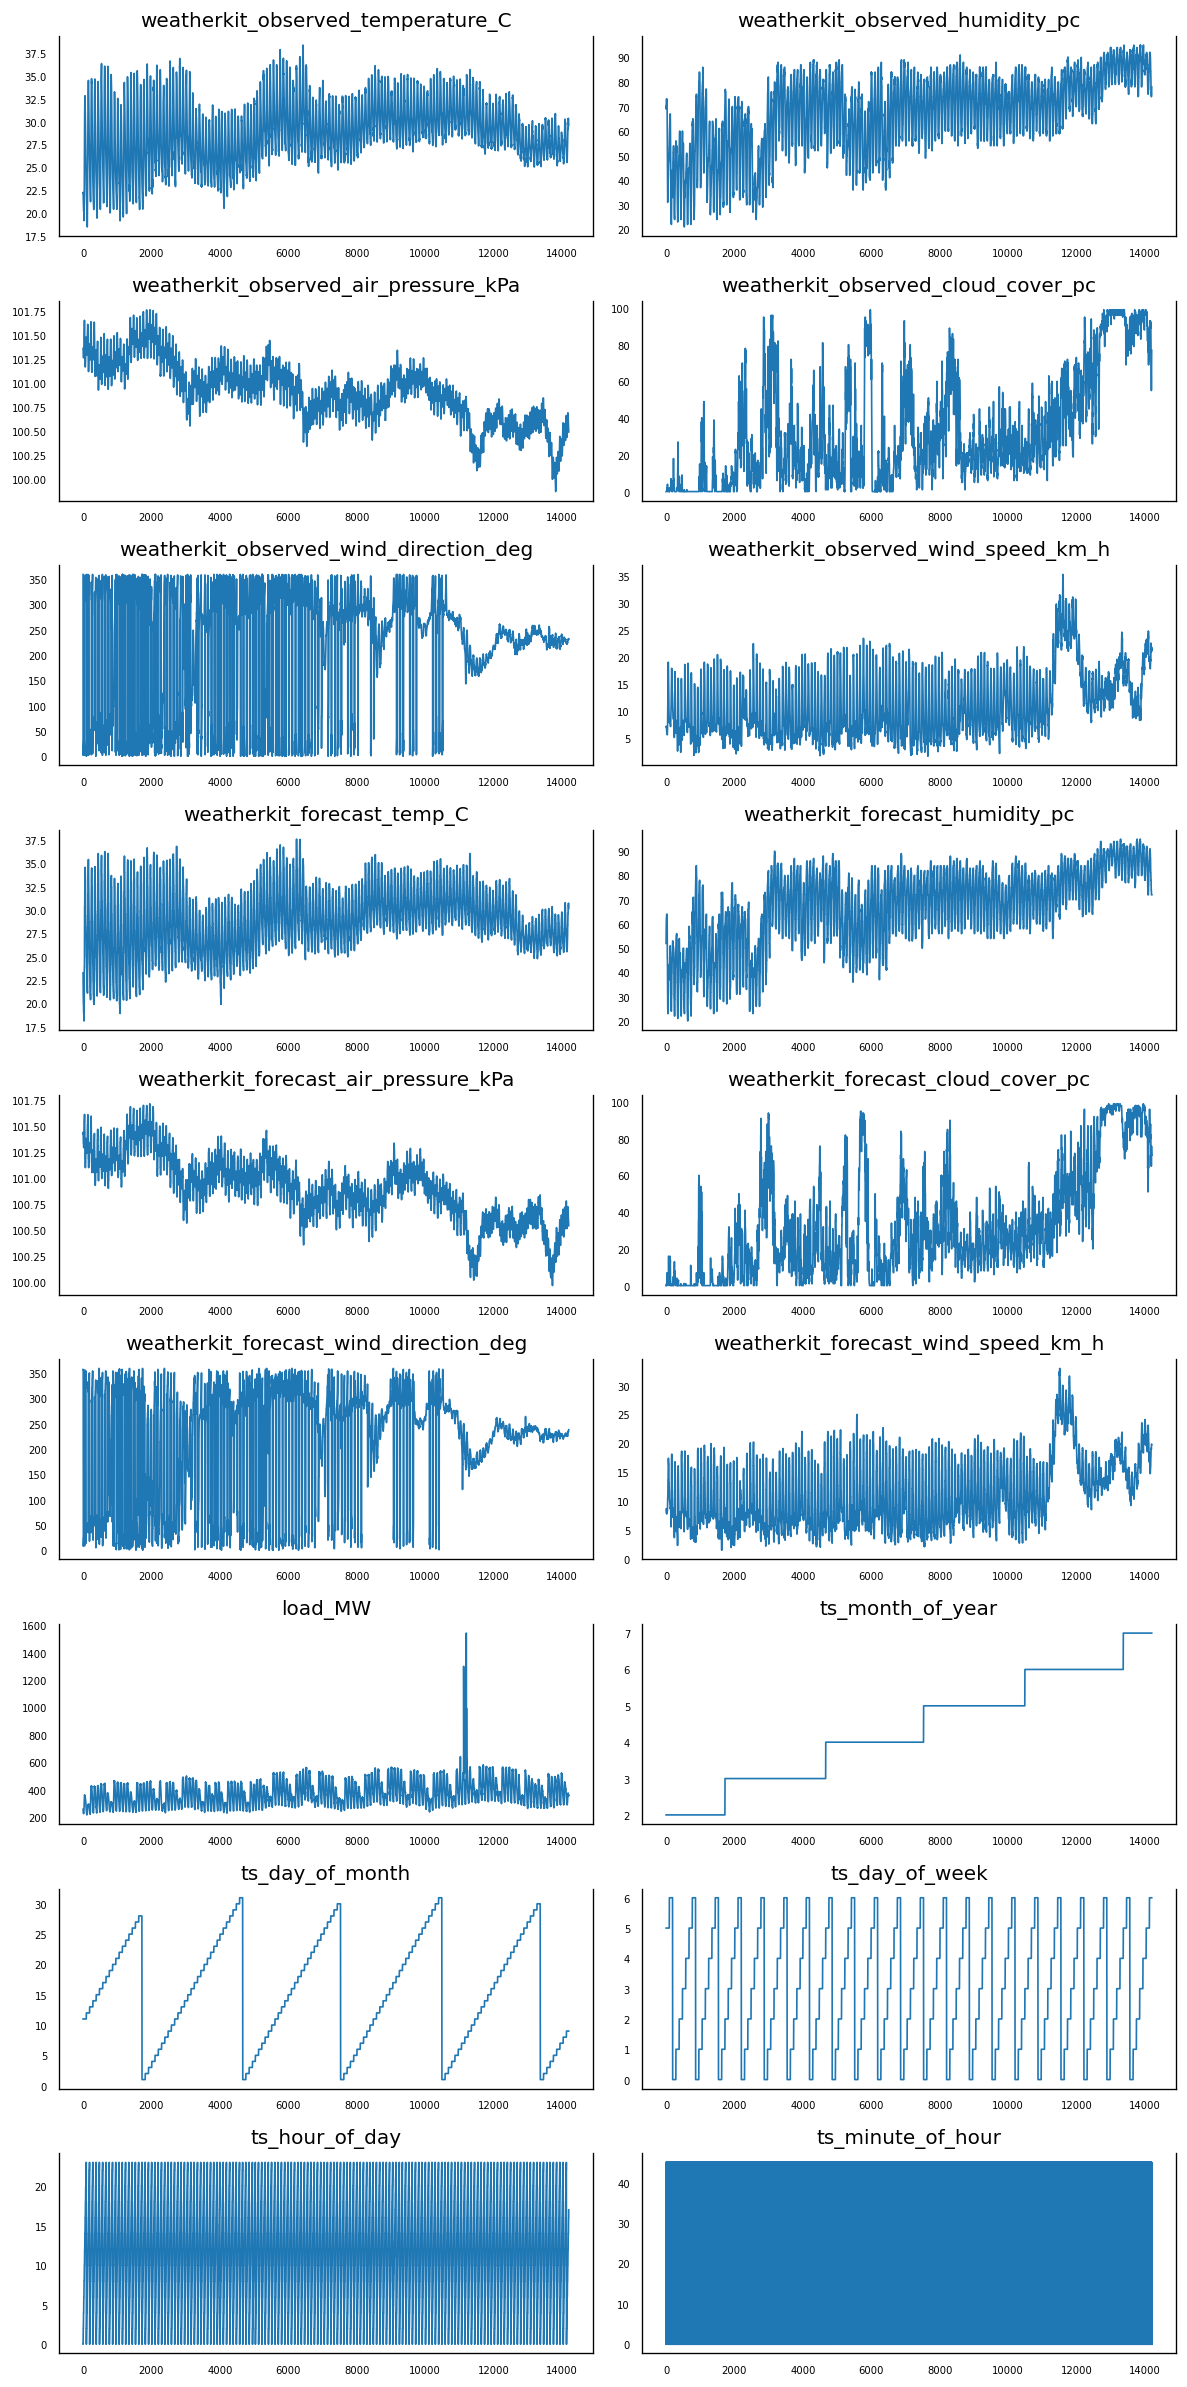

In [103]:
import matplotlib.pyplot as plt
df = utility_data[utility_data.columns[1:]]
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(10,20))
for i, ax in enumerate(axes.flatten()):
    try:
        data = df[df.columns[i]]
        ax.plot(data, linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    except:
        pass

plt.tight_layout()

## Check for causality

In [104]:
import numpy as np
maxlag=np.arange(1,100,1)
maxlag

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((1, len(variables))), columns=variables, index=[target_var])
    for c in df.columns:
        print('column',c)
        test_result = grangercausalitytests(data[[target_var, c]], maxlag=maxlag)
        p_values = [round(test_result[i][0][test][1],4) for i in (maxlag)]
        if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
        min_p_value = np.min(p_values)
        df.loc[target_var, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [target_var + '_y']
    return df

grangers_causation_matrix(df, variables = df.columns)

column weatherkit_observed_temperature_C

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9763  , p=0.1598  , df_denom=14199, df_num=1
ssr based chi2 test:   chi2=1.9768  , p=0.1597  , df=1
likelihood ratio test: chi2=1.9766  , p=0.1597  , df=1
parameter F test:         F=1.9763  , p=0.1598  , df_denom=14199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=406.8688, p=0.0000  , df_denom=14196, df_num=2
ssr based chi2 test:   chi2=814.0242, p=0.0000  , df=2
likelihood ratio test: chi2=791.5486, p=0.0000  , df=2
parameter F test:         F=406.8688, p=0.0000  , df_denom=14196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=294.1976, p=0.0000  , df_denom=14193, df_num=3
ssr based chi2 test:   chi2=883.0282, p=0.0000  , df=3
likelihood ratio test: chi2=856.6603, p=0.0000  , df=3
parameter F test:         F=294.1976, p=0.0000  , df_denom=14193, df_num=3

Granger Causality
number of lags (no zer

ssr based F test:         F=9.5589  , p=0.0000  , df_denom=14118, df_num=28
ssr based chi2 test:   chi2=268.7286, p=0.0000  , df=28
likelihood ratio test: chi2=266.2131, p=0.0000  , df=28
parameter F test:         F=9.5589  , p=0.0000  , df_denom=14118, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=9.3151  , p=0.0000  , df_denom=14115, df_num=29
ssr based chi2 test:   chi2=271.2674, p=0.0000  , df=29
likelihood ratio test: chi2=268.7043, p=0.0000  , df=29
parameter F test:         F=9.3151  , p=0.0000  , df_denom=14115, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=9.0447  , p=0.0000  , df_denom=14112, df_num=30
ssr based chi2 test:   chi2=272.5129, p=0.0000  , df=30
likelihood ratio test: chi2=269.9261, p=0.0000  , df=30
parameter F test:         F=9.0447  , p=0.0000  , df_denom=14112, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=8.7479  , p=0.0000  , df_denom=14109, d

ssr based F test:         F=7.3604  , p=0.0000  , df_denom=14037, df_num=55
ssr based chi2 test:   chi2=408.0220, p=0.0000  , df=55
likelihood ratio test: chi2=402.2491, p=0.0000  , df=55
parameter F test:         F=7.3604  , p=0.0000  , df_denom=14037, df_num=55

Granger Causality
number of lags (no zero) 56
ssr based F test:         F=7.3873  , p=0.0000  , df_denom=14034, df_num=56
ssr based chi2 test:   chi2=417.0216, p=0.0000  , df=56
likelihood ratio test: chi2=410.9934, p=0.0000  , df=56
parameter F test:         F=7.3873  , p=0.0000  , df_denom=14034, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=7.4446  , p=0.0000  , df_denom=14031, df_num=57
ssr based chi2 test:   chi2=427.8230, p=0.0000  , df=57
likelihood ratio test: chi2=421.4811, p=0.0000  , df=57
parameter F test:         F=7.4446  , p=0.0000  , df_denom=14031, df_num=57

Granger Causality
number of lags (no zero) 58
ssr based F test:         F=7.4169  , p=0.0000  , df_denom=14028, d

ssr based F test:         F=4.6248  , p=0.0000  , df_denom=13956, df_num=82
ssr based chi2 test:   chi2=383.7204, p=0.0000  , df=82
likelihood ratio test: chi2=378.5994, p=0.0000  , df=82
parameter F test:         F=4.6248  , p=0.0000  , df_denom=13956, df_num=82

Granger Causality
number of lags (no zero) 83
ssr based F test:         F=4.6198  , p=0.0000  , df_denom=13953, df_num=83
ssr based chi2 test:   chi2=388.0308, p=0.0000  , df=83
likelihood ratio test: chi2=382.7948, p=0.0000  , df=83
parameter F test:         F=4.6198  , p=0.0000  , df_denom=13953, df_num=83

Granger Causality
number of lags (no zero) 84
ssr based F test:         F=4.5547  , p=0.0000  , df_denom=13950, df_num=84
ssr based chi2 test:   chi2=387.2262, p=0.0000  , df=84
likelihood ratio test: chi2=382.0113, p=0.0000  , df=84
parameter F test:         F=4.5547  , p=0.0000  , df_denom=13950, df_num=84

Granger Causality
number of lags (no zero) 85
ssr based F test:         F=4.4516  , p=0.0000  , df_denom=13947, d

ssr based F test:         F=20.1740 , p=0.0000  , df_denom=14166, df_num=12
ssr based chi2 test:   chi2=242.5151, p=0.0000  , df=12
likelihood ratio test: chi2=240.4662, p=0.0000  , df=12
parameter F test:         F=20.1740 , p=0.0000  , df_denom=14166, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=19.8781 , p=0.0000  , df_denom=14163, df_num=13
ssr based chi2 test:   chi2=258.9083, p=0.0000  , df=13
likelihood ratio test: chi2=256.5747, p=0.0000  , df=13
parameter F test:         F=19.8781 , p=0.0000  , df_denom=14163, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=21.2026 , p=0.0000  , df_denom=14160, df_num=14
ssr based chi2 test:   chi2=297.4441, p=0.0000  , df=14
likelihood ratio test: chi2=294.3694, p=0.0000  , df=14
parameter F test:         F=21.2026 , p=0.0000  , df_denom=14160, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=18.6984 , p=0.0000  , df_denom=14157, d

parameter F test:         F=10.2688 , p=0.0000  , df_denom=14085, df_num=39

Granger Causality
number of lags (no zero) 40
ssr based F test:         F=9.9561  , p=0.0000  , df_denom=14082, df_num=40
ssr based chi2 test:   chi2=400.5352, p=0.0000  , df=40
likelihood ratio test: chi2=394.9761, p=0.0000  , df=40
parameter F test:         F=9.9561  , p=0.0000  , df_denom=14082, df_num=40

Granger Causality
number of lags (no zero) 41
ssr based F test:         F=9.6568  , p=0.0000  , df_denom=14079, df_num=41
ssr based chi2 test:   chi2=398.2624, p=0.0000  , df=41
likelihood ratio test: chi2=392.7652, p=0.0000  , df=41
parameter F test:         F=9.6568  , p=0.0000  , df_denom=14079, df_num=41

Granger Causality
number of lags (no zero) 42
ssr based F test:         F=9.4016  , p=0.0000  , df_denom=14076, df_num=42
ssr based chi2 test:   chi2=397.2532, p=0.0000  , df=42
likelihood ratio test: chi2=391.7832, p=0.0000  , df=42
parameter F test:         F=9.4016  , p=0.0000  , df_denom=14076, d

ssr based F test:         F=5.7957  , p=0.0000  , df_denom=14004, df_num=66
ssr based chi2 test:   chi2=386.1489, p=0.0000  , df=66
likelihood ratio test: chi2=380.9693, p=0.0000  , df=66
parameter F test:         F=5.7957  , p=0.0000  , df_denom=14004, df_num=66

Granger Causality
number of lags (no zero) 67
ssr based F test:         F=6.0729  , p=0.0000  , df_denom=14001, df_num=67
ssr based chi2 test:   chi2=410.8058, p=0.0000  , df=67
likelihood ratio test: chi2=404.9498, p=0.0000  , df=67
parameter F test:         F=6.0729  , p=0.0000  , df_denom=14001, df_num=67

Granger Causality
number of lags (no zero) 68
ssr based F test:         F=6.0602  , p=0.0000  , df_denom=13998, df_num=68
ssr based chi2 test:   chi2=416.1294, p=0.0000  , df=68
likelihood ratio test: chi2=410.1217, p=0.0000  , df=68
parameter F test:         F=6.0602  , p=0.0000  , df_denom=13998, df_num=68

Granger Causality
number of lags (no zero) 69
ssr based F test:         F=5.9949  , p=0.0000  , df_denom=13995, d

ssr based F test:         F=4.4637  , p=0.0000  , df_denom=13923, df_num=93
ssr based chi2 test:   chi2=420.7027, p=0.0000  , df=93
likelihood ratio test: chi2=414.5528, p=0.0000  , df=93
parameter F test:         F=4.4637  , p=0.0000  , df_denom=13923, df_num=93

Granger Causality
number of lags (no zero) 94
ssr based F test:         F=4.2947  , p=0.0000  , df_denom=13920, df_num=94
ssr based chi2 test:   chi2=409.1823, p=0.0000  , df=94
likelihood ratio test: chi2=403.3611, p=0.0000  , df=94
parameter F test:         F=4.2947  , p=0.0000  , df_denom=13920, df_num=94

Granger Causality
number of lags (no zero) 95
ssr based F test:         F=4.0923  , p=0.0000  , df_denom=13917, df_num=95
ssr based chi2 test:   chi2=394.0998, p=0.0000  , df=95
likelihood ratio test: chi2=388.6957, p=0.0000  , df=95
parameter F test:         F=4.0923  , p=0.0000  , df_denom=13917, df_num=95

Granger Causality
number of lags (no zero) 96
ssr based F test:         F=3.7173  , p=0.0000  , df_denom=13914, d

parameter F test:         F=8.9961  , p=0.0000  , df_denom=14142, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=8.7511  , p=0.0000  , df_denom=14139, df_num=21
ssr based chi2 test:   chi2=184.3322, p=0.0000  , df=21
likelihood ratio test: chi2=183.1445, p=0.0000  , df=21
parameter F test:         F=8.7511  , p=0.0000  , df_denom=14139, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=8.4583  , p=0.0000  , df_denom=14136, df_num=22
ssr based chi2 test:   chi2=186.6749, p=0.0000  , df=22
likelihood ratio test: chi2=185.4569, p=0.0000  , df=22
parameter F test:         F=8.4583  , p=0.0000  , df_denom=14136, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=9.0554  , p=0.0000  , df_denom=14133, df_num=23
ssr based chi2 test:   chi2=208.9670, p=0.0000  , df=23
likelihood ratio test: chi2=207.4422, p=0.0000  , df=23
parameter F test:         F=9.0554  , p=0.0000  , df_denom=14133, d

ssr based F test:         F=13.8184 , p=0.0000  , df_denom=14061, df_num=47
ssr based chi2 test:   chi2=653.8543, p=0.0000  , df=47
likelihood ratio test: chi2=639.2032, p=0.0000  , df=47
parameter F test:         F=13.8184 , p=0.0000  , df_denom=14061, df_num=47

Granger Causality
number of lags (no zero) 48
ssr based F test:         F=14.0220 , p=0.0000  , df_denom=14058, df_num=48
ssr based chi2 test:   chi2=677.7010, p=0.0000  , df=48
likelihood ratio test: chi2=661.9777, p=0.0000  , df=48
parameter F test:         F=14.0220 , p=0.0000  , df_denom=14058, df_num=48

Granger Causality
number of lags (no zero) 49
ssr based F test:         F=14.0441 , p=0.0000  , df_denom=14055, df_num=49
ssr based chi2 test:   chi2=693.0073, p=0.0000  , df=49
likelihood ratio test: chi2=676.5760, p=0.0000  , df=49
parameter F test:         F=14.0441 , p=0.0000  , df_denom=14055, df_num=49

Granger Causality
number of lags (no zero) 50
ssr based F test:         F=13.9864 , p=0.0000  , df_denom=14052, d

ssr based F test:         F=6.5980  , p=0.0000  , df_denom=13980, df_num=74
ssr based chi2 test:   chi2=493.4525, p=0.0000  , df=74
likelihood ratio test: chi2=485.0312, p=0.0000  , df=74
parameter F test:         F=6.5980  , p=0.0000  , df_denom=13980, df_num=74

Granger Causality
number of lags (no zero) 75
ssr based F test:         F=7.2405  , p=0.0000  , df_denom=13977, df_num=75
ssr based chi2 test:   chi2=548.9008, p=0.0000  , df=75
likelihood ratio test: chi2=538.5062, p=0.0000  , df=75
parameter F test:         F=7.2405  , p=0.0000  , df_denom=13977, df_num=75

Granger Causality
number of lags (no zero) 76
ssr based F test:         F=7.9236  , p=0.0000  , df_denom=13974, df_num=76
ssr based chi2 test:   chi2=608.7864, p=0.0000  , df=76
likelihood ratio test: chi2=596.0341, p=0.0000  , df=76
parameter F test:         F=7.9236  , p=0.0000  , df_denom=13974, df_num=76

Granger Causality
number of lags (no zero) 77
ssr based F test:         F=7.4613  , p=0.0000  , df_denom=13971, d

ssr based F test:         F=6.2071  , p=0.0000  , df_denom=14181, df_num=7
ssr based chi2 test:   chi2=43.4954 , p=0.0000  , df=7
likelihood ratio test: chi2=43.4289 , p=0.0000  , df=7
parameter F test:         F=6.2071  , p=0.0000  , df_denom=14181, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=4.7608  , p=0.0000  , df_denom=14178, df_num=8
ssr based chi2 test:   chi2=38.1322 , p=0.0000  , df=8
likelihood ratio test: chi2=38.0811 , p=0.0000  , df=8
parameter F test:         F=4.7608  , p=0.0000  , df_denom=14178, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.4087  , p=0.0000  , df_denom=14175, df_num=9
ssr based chi2 test:   chi2=39.7319 , p=0.0000  , df=9
likelihood ratio test: chi2=39.6764 , p=0.0000  , df=9
parameter F test:         F=4.4087  , p=0.0000  , df_denom=14175, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.9833  , p=0.0000  , df_denom=14172, df_num=10
ssr b

ssr based F test:         F=2.2723  , p=0.0000  , df_denom=14100, df_num=34
ssr based chi2 test:   chi2=77.6351 , p=0.0000  , df=34
likelihood ratio test: chi2=77.4232 , p=0.0000  , df=34
parameter F test:         F=2.2723  , p=0.0000  , df_denom=14100, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=2.1609  , p=0.0001  , df_denom=14097, df_num=35
ssr based chi2 test:   chi2=76.0120 , p=0.0001  , df=35
likelihood ratio test: chi2=75.8089 , p=0.0001  , df=35
parameter F test:         F=2.1609  , p=0.0001  , df_denom=14097, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=2.1074  , p=0.0001  , df_denom=14094, df_num=36
ssr based chi2 test:   chi2=76.2584 , p=0.0001  , df=36
likelihood ratio test: chi2=76.0539 , p=0.0001  , df=36
parameter F test:         F=2.1074  , p=0.0001  , df_denom=14094, df_num=36

Granger Causality
number of lags (no zero) 37
ssr based F test:         F=2.0075  , p=0.0003  , df_denom=14091, d

ssr based F test:         F=1.0511  , p=0.3682  , df_denom=14019, df_num=61
ssr based chi2 test:   chi2=64.6791 , p=0.3495  , df=61
likelihood ratio test: chi2=64.5316 , p=0.3542  , df=61
parameter F test:         F=1.0511  , p=0.3682  , df_denom=14019, df_num=61

Granger Causality
number of lags (no zero) 62
ssr based F test:         F=1.0252  , p=0.4214  , df_denom=14016, df_num=62
ssr based chi2 test:   chi2=64.1310 , p=0.4017  , df=62
likelihood ratio test: chi2=63.9860 , p=0.4066  , df=62
parameter F test:         F=1.0252  , p=0.4214  , df_denom=14016, df_num=62

Granger Causality
number of lags (no zero) 63
ssr based F test:         F=0.9930  , p=0.4921  , df_denom=14013, df_num=63
ssr based chi2 test:   chi2=63.1272 , p=0.4718  , df=63
likelihood ratio test: chi2=62.9867 , p=0.4768  , df=63
parameter F test:         F=0.9930  , p=0.4921  , df_denom=14013, df_num=63

Granger Causality
number of lags (no zero) 64
ssr based F test:         F=0.9571  , p=0.5742  , df_denom=14010, d

ssr based F test:         F=0.9424  , p=0.6324  , df_denom=13938, df_num=88
ssr based chi2 test:   chi2=83.9887 , p=0.6013  , df=88
likelihood ratio test: chi2=83.7398 , p=0.6087  , df=88
parameter F test:         F=0.9424  , p=0.6324  , df_denom=13938, df_num=88

Granger Causality
number of lags (no zero) 89
ssr based F test:         F=0.9401  , p=0.6393  , df_denom=13935, df_num=89
ssr based chi2 test:   chi2=84.7475 , p=0.6079  , df=89
likelihood ratio test: chi2=84.4941 , p=0.6154  , df=89
parameter F test:         F=0.9401  , p=0.6393  , df_denom=13935, df_num=89

Granger Causality
number of lags (no zero) 90
ssr based F test:         F=0.9333  , p=0.6581  , df_denom=13932, df_num=90
ssr based chi2 test:   chi2=85.0840 , p=0.6268  , df=90
likelihood ratio test: chi2=84.8285 , p=0.6343  , df=90
parameter F test:         F=0.9333  , p=0.6581  , df_denom=13932, df_num=90

Granger Causality
number of lags (no zero) 91
ssr based F test:         F=0.9251  , p=0.6799  , df_denom=13929, d

ssr based F test:         F=3.7482  , p=0.0000  , df_denom=14154, df_num=16
ssr based chi2 test:   chi2=60.1112 , p=0.0000  , df=16
likelihood ratio test: chi2=59.9842 , p=0.0000  , df=16
parameter F test:         F=3.7482  , p=0.0000  , df_denom=14154, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=3.6555  , p=0.0000  , df_denom=14151, df_num=17
ssr based chi2 test:   chi2=62.2973 , p=0.0000  , df=17
likelihood ratio test: chi2=62.1610 , p=0.0000  , df=17
parameter F test:         F=3.6555  , p=0.0000  , df_denom=14151, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=3.5300  , p=0.0000  , df_denom=14148, df_num=18
ssr based chi2 test:   chi2=63.7066 , p=0.0000  , df=18
likelihood ratio test: chi2=63.5640 , p=0.0000  , df=18
parameter F test:         F=3.5300  , p=0.0000  , df_denom=14148, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=3.1645  , p=0.0000  , df_denom=14145, d

ssr based F test:         F=1.5376  , p=0.0134  , df_denom=14073, df_num=43
ssr based chi2 test:   chi2=66.5265 , p=0.0122  , df=43
likelihood ratio test: chi2=66.3707 , p=0.0126  , df=43
parameter F test:         F=1.5376  , p=0.0134  , df_denom=14073, df_num=43

Granger Causality
number of lags (no zero) 44
ssr based F test:         F=1.4801  , p=0.0211  , df_denom=14070, df_num=44
ssr based chi2 test:   chi2=65.5350 , p=0.0192  , df=44
likelihood ratio test: chi2=65.3838 , p=0.0198  , df=44
parameter F test:         F=1.4801  , p=0.0211  , df_denom=14070, df_num=44

Granger Causality
number of lags (no zero) 45
ssr based F test:         F=1.5036  , p=0.0162  , df_denom=14067, df_num=45
ssr based chi2 test:   chi2=68.0985 , p=0.0147  , df=45
likelihood ratio test: chi2=67.9352 , p=0.0152  , df=45
parameter F test:         F=1.5036  , p=0.0162  , df_denom=14067, df_num=45

Granger Causality
number of lags (no zero) 46
ssr based F test:         F=1.6414  , p=0.0040  , df_denom=14064, d

ssr based F test:         F=1.0275  , p=0.4142  , df_denom=13992, df_num=70
ssr based chi2 test:   chi2=72.6504 , p=0.3907  , df=70
likelihood ratio test: chi2=72.4643 , p=0.3966  , df=70
parameter F test:         F=1.0275  , p=0.4142  , df_denom=13992, df_num=70

Granger Causality
number of lags (no zero) 71
ssr based F test:         F=1.0598  , p=0.3431  , df_denom=13989, df_num=71
ssr based chi2 test:   chi2=76.0182 , p=0.3202  , df=71
likelihood ratio test: chi2=75.8145 , p=0.3260  , df=71
parameter F test:         F=1.0598  , p=0.3431  , df_denom=13989, df_num=71

Granger Causality
number of lags (no zero) 72
ssr based F test:         F=1.0802  , p=0.3006  , df_denom=13986, df_num=72
ssr based chi2 test:   chi2=78.5839 , p=0.2783  , df=72
likelihood ratio test: chi2=78.3662 , p=0.2841  , df=72
parameter F test:         F=1.0802  , p=0.3006  , df_denom=13986, df_num=72

Granger Causality
number of lags (no zero) 73
ssr based F test:         F=1.1122  , p=0.2399  , df_denom=13983, d

ssr based F test:         F=0.6087  , p=0.9991  , df_denom=13911, df_num=97
ssr based chi2 test:   chi2=59.8730 , p=0.9989  , df=97
likelihood ratio test: chi2=59.7463 , p=0.9989  , df=97
parameter F test:         F=0.6087  , p=0.9991  , df_denom=13911, df_num=97

Granger Causality
number of lags (no zero) 98
ssr based F test:         F=0.5462  , p=0.9999  , df_denom=13908, df_num=98
ssr based chi2 test:   chi2=54.2864 , p=0.9999  , df=98
likelihood ratio test: chi2=54.1822 , p=0.9999  , df=98
parameter F test:         F=0.5462  , p=0.9999  , df_denom=13908, df_num=98

Granger Causality
number of lags (no zero) 99
ssr based F test:         F=0.4857  , p=1.0000  , df_denom=13905, df_num=99
ssr based chi2 test:   chi2=48.7703 , p=1.0000  , df=99
likelihood ratio test: chi2=48.6862 , p=1.0000  , df=99
parameter F test:         F=0.4857  , p=1.0000  , df_denom=13905, df_num=99
column weatherkit_observed_wind_speed_km_h

Granger Causality
number of lags (no zero) 1
ssr based F test:        

ssr based F test:         F=1.9419  , p=0.0032  , df_denom=14127, df_num=25
ssr based chi2 test:   chi2=48.7240 , p=0.0031  , df=25
likelihood ratio test: chi2=48.6405 , p=0.0031  , df=25
parameter F test:         F=1.9419  , p=0.0032  , df_denom=14127, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.8368  , p=0.0058  , df_denom=14124, df_num=26
ssr based chi2 test:   chi2=47.9366 , p=0.0055  , df=26
likelihood ratio test: chi2=47.8558 , p=0.0056  , df=26
parameter F test:         F=1.8368  , p=0.0058  , df_denom=14124, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.5034  , p=0.0453  , df_denom=14121, df_num=27
ssr based chi2 test:   chi2=40.7491 , p=0.0435  , df=27
likelihood ratio test: chi2=40.6907 , p=0.0441  , df=27
parameter F test:         F=1.5034  , p=0.0453  , df_denom=14121, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.3685  , p=0.0928  , df_denom=14118, d

ssr based F test:         F=7.2657  , p=0.0000  , df_denom=14046, df_num=52
ssr based chi2 test:   chi2=380.6391, p=0.0000  , df=52
likelihood ratio test: chi2=375.6098, p=0.0000  , df=52
parameter F test:         F=7.2657  , p=0.0000  , df_denom=14046, df_num=52

Granger Causality
number of lags (no zero) 53
ssr based F test:         F=7.2369  , p=0.0000  , df_denom=14043, df_num=53
ssr based chi2 test:   chi2=386.4781, p=0.0000  , df=53
likelihood ratio test: chi2=381.2943, p=0.0000  , df=53
parameter F test:         F=7.2369  , p=0.0000  , df_denom=14043, df_num=53

Granger Causality
number of lags (no zero) 54
ssr based F test:         F=7.4127  , p=0.0000  , df_denom=14040, df_num=54
ssr based chi2 test:   chi2=403.3916, p=0.0000  , df=54
likelihood ratio test: chi2=397.7482, p=0.0000  , df=54
parameter F test:         F=7.4127  , p=0.0000  , df_denom=14040, df_num=54

Granger Causality
number of lags (no zero) 55
ssr based F test:         F=7.6386  , p=0.0000  , df_denom=14037, d

ssr based F test:         F=3.8526  , p=0.0000  , df_denom=13965, df_num=79
ssr based chi2 test:   chi2=307.8172, p=0.0000  , df=79
likelihood ratio test: chi2=304.5108, p=0.0000  , df=79
parameter F test:         F=3.8526  , p=0.0000  , df_denom=13965, df_num=79

Granger Causality
number of lags (no zero) 80
ssr based F test:         F=3.3706  , p=0.0000  , df_denom=13962, df_num=80
ssr based chi2 test:   chi2=272.7546, p=0.0000  , df=80
likelihood ratio test: chi2=270.1542, p=0.0000  , df=80
parameter F test:         F=3.3706  , p=0.0000  , df_denom=13962, df_num=80

Granger Causality
number of lags (no zero) 81
ssr based F test:         F=3.1736  , p=0.0000  , df_denom=13959, df_num=81
ssr based chi2 test:   chi2=260.0667, p=0.0000  , df=81
likelihood ratio test: chi2=257.7011, p=0.0000  , df=81
parameter F test:         F=3.1736  , p=0.0000  , df_denom=13959, df_num=81

Granger Causality
number of lags (no zero) 82
ssr based F test:         F=3.1395  , p=0.0000  , df_denom=13956, d

ssr based F test:         F=61.5553 , p=0.0000  , df_denom=14181, df_num=7
ssr based chi2 test:   chi2=431.3427, p=0.0000  , df=7
likelihood ratio test: chi2=424.9193, p=0.0000  , df=7
parameter F test:         F=61.5553 , p=0.0000  , df_denom=14181, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=32.6017 , p=0.0000  , df_denom=14178, df_num=8
ssr based chi2 test:   chi2=261.1260, p=0.0000  , df=8
likelihood ratio test: chi2=258.7533, p=0.0000  , df=8
parameter F test:         F=32.6017 , p=0.0000  , df_denom=14178, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=30.6487 , p=0.0000  , df_denom=14175, df_num=9
ssr based chi2 test:   chi2=276.2077, p=0.0000  , df=9
likelihood ratio test: chi2=273.5546, p=0.0000  , df=9
parameter F test:         F=30.6487 , p=0.0000  , df_denom=14175, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=26.8717 , p=0.0000  , df_denom=14172, df_num=10
ssr b

ssr based F test:         F=6.6470  , p=0.0000  , df_denom=14097, df_num=35
ssr based chi2 test:   chi2=233.8165, p=0.0000  , df=35
likelihood ratio test: chi2=231.9081, p=0.0000  , df=35
parameter F test:         F=6.6470  , p=0.0000  , df_denom=14097, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=6.4411  , p=0.0000  , df_denom=14094, df_num=36
ssr based chi2 test:   chi2=233.0808, p=0.0000  , df=36
likelihood ratio test: chi2=231.1842, p=0.0000  , df=36
parameter F test:         F=6.4411  , p=0.0000  , df_denom=14094, df_num=36

Granger Causality
number of lags (no zero) 37
ssr based F test:         F=6.2359  , p=0.0000  , df_denom=14091, df_num=37
ssr based chi2 test:   chi2=231.9549, p=0.0000  , df=37
likelihood ratio test: chi2=230.0763, p=0.0000  , df=37
parameter F test:         F=6.2359  , p=0.0000  , df_denom=14091, df_num=37

Granger Causality
number of lags (no zero) 38
ssr based F test:         F=6.1548  , p=0.0000  , df_denom=14088, d

In [ ]:
# ts_day_of_month and ts_minute_of_hour do not have a significant causal impact on target, therefore we drop them after data splitting

In [21]:
ts_vars.remove('ts_day_of_month')
ts_vars.remove('ts_minute_of_hour')
ts_vars

['ts_month_of_year', 'ts_day_of_week', 'ts_hour_of_day']

## Data splitting

In [22]:
variables = observed_vars+forecast_vars+ts_vars+[target_var]

In [23]:
# train/test split
from sklearn.model_selection import train_test_split

month_days = utility_data.ts_month_of_year.astype(str)+'-'+utility_data.ts_day_of_month.astype(str)
days_tr,days_ts = train_test_split(month_days.unique(), test_size=14, shuffle=False)
train_msk = month_days.isin(days_tr)
test_msk = month_days.isin(days_ts)

df_train = utility_data.loc[:,variables][train_msk]
df_test = utility_data.loc[:,variables][test_msk]

In [24]:
print(df_train.shape)
print(df_test.shape)

(12889, 16)
(1314, 16)


## Check for stationarity using ADF test

In [31]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [32]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

C:\Users\Amin\AppData\Local\Temp\ipykernel_9960\3962751950.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_train.iteritems():


    Augmented Dickey-Fuller Test on "weatherkit_observed_temperature_C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.0791
 No. Lags Chosen       = 37
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "weatherkit_observed_humidity_pc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.2477
 No. Lags Chosen       = 35
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "weatherkit_observed_air_pressure_kPa" 
    ----------------------------------------

In [25]:
df_differenced=df_train.diff().dropna()

In [26]:
df_differenced.shape

(12888, 16)

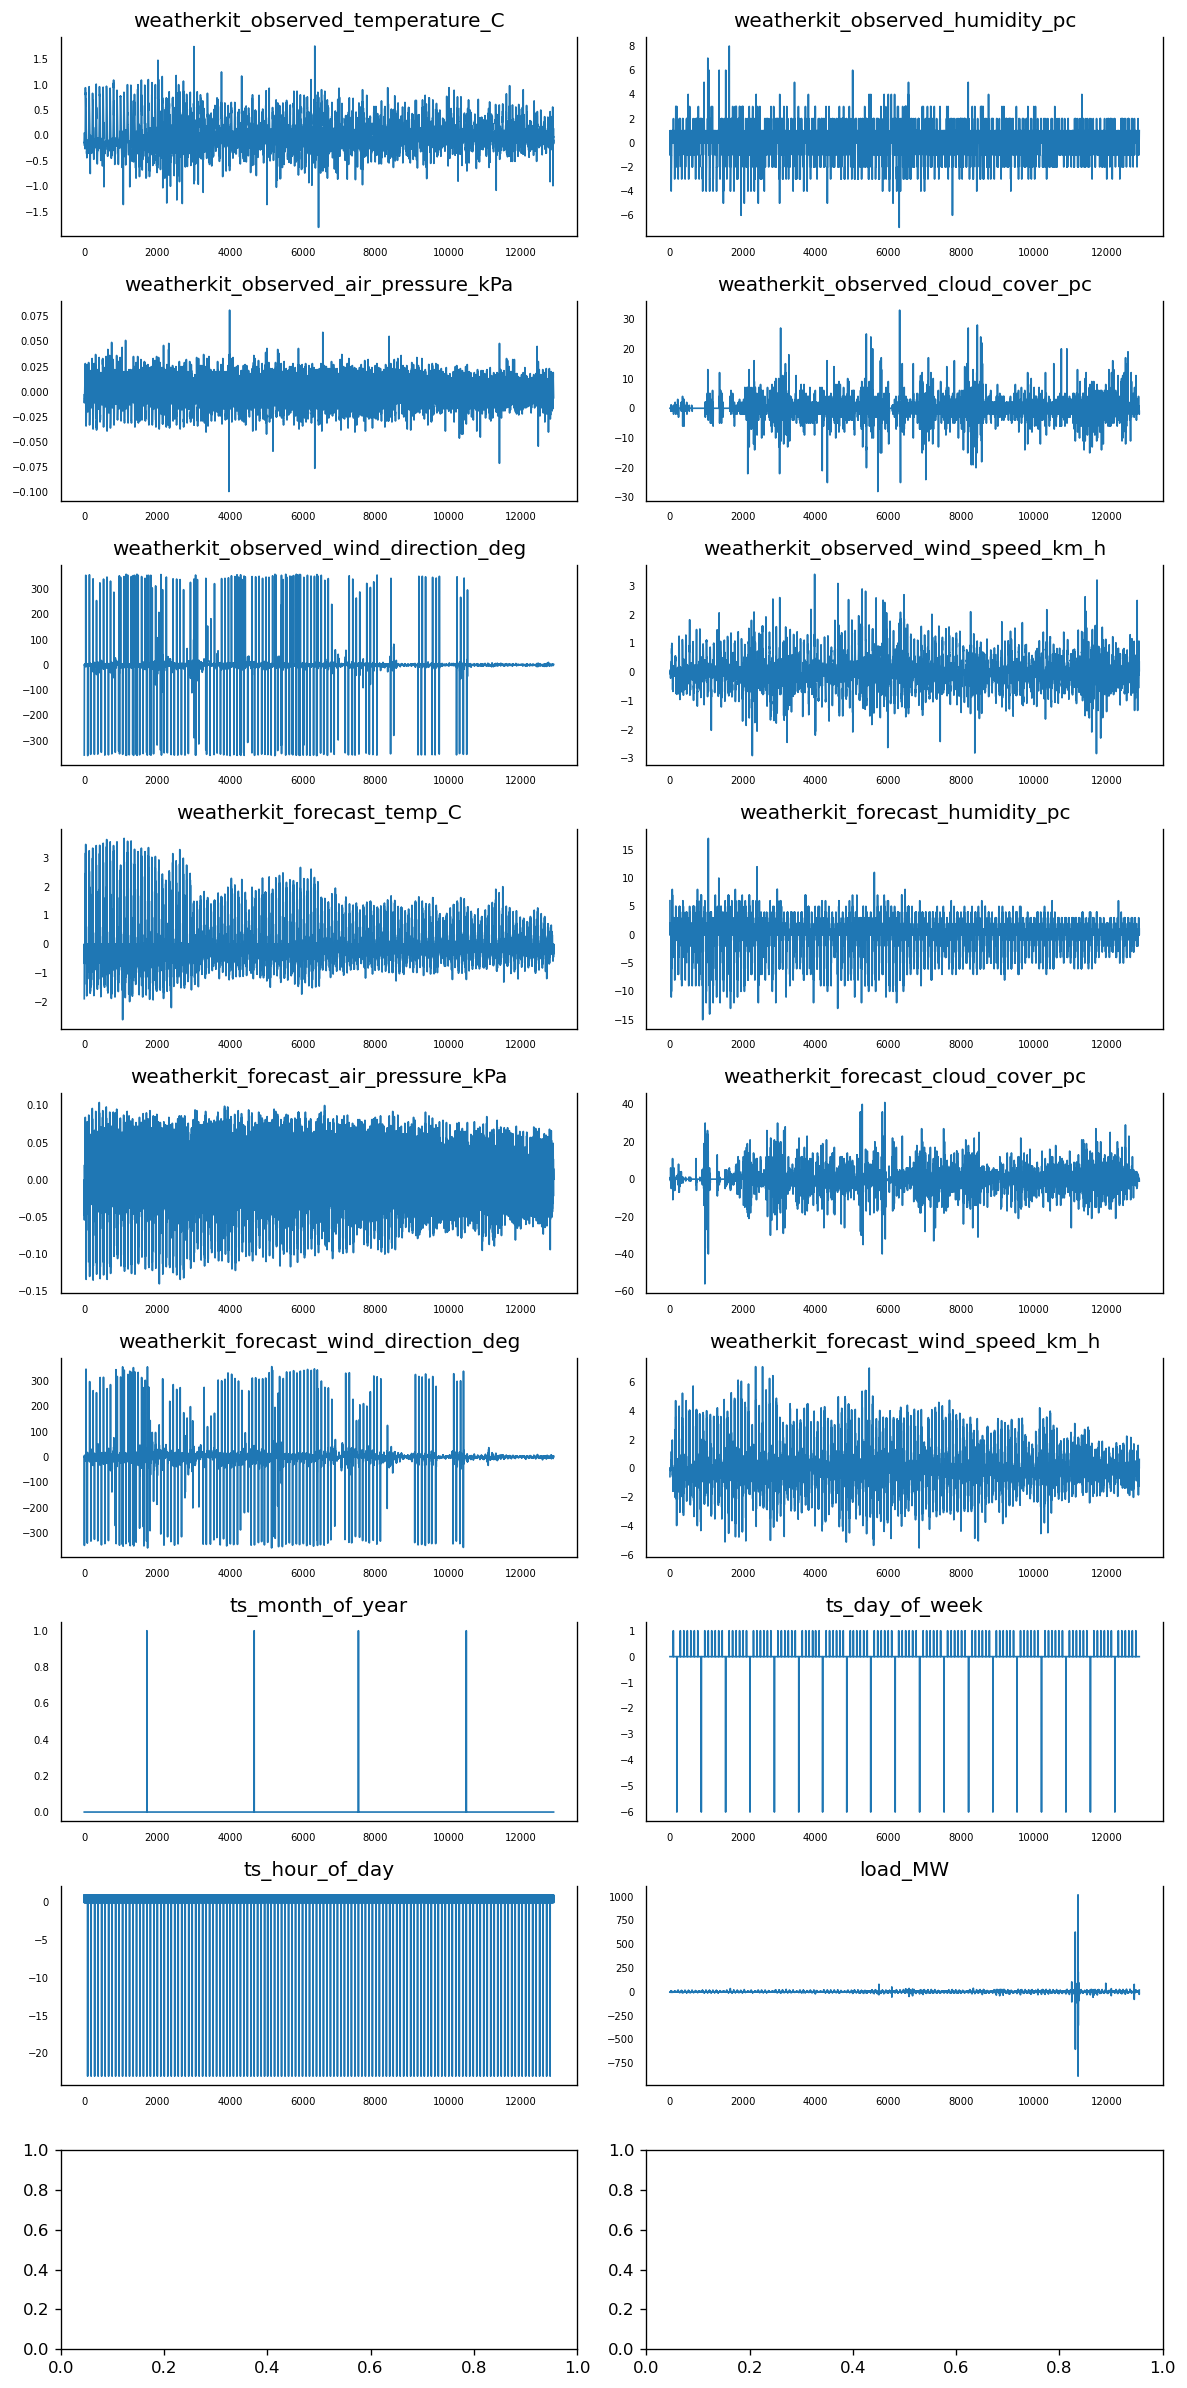

In [34]:
df = df_differenced
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(10,20))
for i, ax in enumerate(axes.flatten()):
    try:
        data = df[df.columns[i]]
        ax.plot(data, linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    except:
        pass

plt.tight_layout()

In [35]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

C:\Users\Amin\AppData\Local\Temp\ipykernel_9960\3965777996.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_differenced.iteritems():


    Augmented Dickey-Fuller Test on "weatherkit_observed_temperature_C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -23.9043
 No. Lags Chosen       = 41
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "weatherkit_observed_humidity_pc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -24.4707
 No. Lags Chosen       = 41
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "weatherkit_observed_air_pressure_kPa" 
    ----------------------------------------

In [122]:
# all series are stationary according to the ADF test

## check stationarity using KPSS test

In [36]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries, signif=0.05):
    print("Results of KPSS Test on", timeseries.name)
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    p_value = kpsstest[1]
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Stationary.")  

In [37]:
for _, column in df_differenced.items():
    kpss_test(column)
    print('\n')

Results of KPSS Test on weatherkit_observed_temperature_C
Test Statistic            0.006725
p-value                   0.100000
Lags Used                66.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
 => P-Value = 0.1. Weak evidence to reject the Null Hypothesis.
 => Series is Stationary.


Results of KPSS Test on weatherkit_observed_humidity_pc
Test Statistic            0.005988
p-value                   0.100000
Lags Used                65.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
 => P-Value = 0.1. Weak evidence to reject the Null Hypothesis.
 => Series is Stationary.


Results of KPSS Test on weatherkit_observed_air_pressure_kPa
Test Statistic            0.004376
p-value                   0.100000
Lags Used                64.000000
Critical Value (

C:\Users\Amin\AppData\Local\Temp\ipykernel_9960\2925416066.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
C:\Users\Amin\AppData\Local\Temp\ipykernel_9960\2925416066.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
C:\Users\Amin\AppData\Local\Temp\ipykernel_9960\2925416066.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
C:\Users\Amin\AppData\Local\Temp\ipykernel_9960\2925416066.py:6: InterpolationWarning: The test statistic is outside of the 

In [ ]:
# Given the results of both ADF and KPSS tests, the dataset is staitionary after one differcing

In [57]:
df_differenced

weatherkit_observed_temperature_C  weatherkit_observed_humidity_pc  \
1                                   0.04                             -1.0   
2                                  -0.15                              1.0   
3                                  -0.15                              0.0   
4                                  -0.15                              0.0   
5                                  -0.14                              1.0   
...                                  ...                              ...   
12916                               0.12                             -1.0   
12917                               0.16                              0.0   
12918                               0.19                              0.0   
12919                               0.14                             -1.0   
12920                               0.09                              0.0   

       weatherkit_observed_air_pressure_kPa  \
1                                    -0.003   
2                                    -0.010   
3                                    -0.011   
4                                    -0.011   
5                                    -0.009   
...                                     ...   
12916                                 0.015   
12917                                 0.019   
12918                                 0.019   
12919                                 0.025   
12920                                 0.013   

       weatherkit_observed_cloud_cover_pc  \
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
5                                     0.0   
...                                   ...   
12916                                -1.0   
12917                                 0.0   
12918                                 0.0   
12919                                -1.0   
12920                                -1.0   

       weatherkit_observed_wind_direction_deg  \
1                                      -357.0   
2                                         2.0   
3                                         2.0   
4                                         2.0   
5                                         2.0   
...                                       ...   
12916                                     0.0   
12917                                     0.0   
12918                                     0.0   
12919                                     2.0   
12920                                    -1.0   

       weatherkit_observed_wind_speed_km_h  weatherkit_forecast_temp_C  \
1                                     0.06                       -1.90   
2                                    -0.04                        0.00   
3                                    -0.06                        0.00   
4                                    -0.06                        0.00   
5                                    -0.02                       -0.56   
...                                    ...                         ...   
12916                                -0.21                        0.36   
12917                                -0.29                        0.00   
12918                                -0.33                        0.00   
12919                                -0.21                        0.00   
12920                                -0.33                        0.37   

       weatherkit_forecast_humidity_pc  weatherkit_forecast_air_pressure_kPa  \
1                                5.999                                 0.019   
2                                0.000                                 0.000   
3                                0.000                                 0.000   
4                                0.000                                 0.000   
5                                2.001                                -0.054   
...               

## Select the order (P) of VAR model

In [27]:
from statsmodels.tsa.api import VAR

model = VAR(df_differenced)

x = model.select_order(maxlags=int(96*1.5))

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
tun_res = x.summary()
tun_res

<class 'statsmodels.iolib.table.SimpleTable'>

In [56]:
tun_res_html = tun_res.as_html()
tun_res_html=tun_res_html.replace('*','')
tun_res_df=pd.read_html(tun_res_html, header=0, index_col=0)[0]
tun_res_df=tun_res_df.astype(float)
tun_res_df['FPE'] = np.log10(tun_res_df.FPE)

<AxesSubplot:>

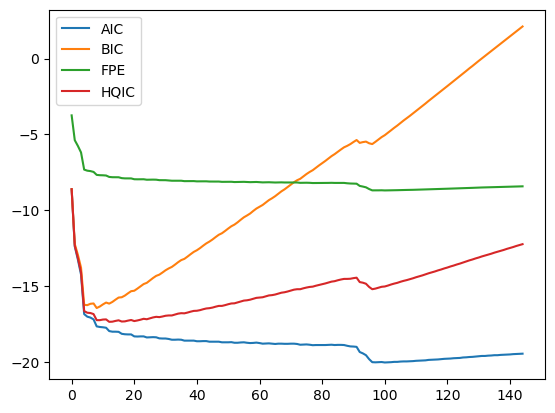

In [57]:
tun_res_df.plot.line()

In [ ]:
# VAR order P = 100 has the minimum AIC and FPE

## Train the VAR model

In [67]:
from statsmodels.tsa.api import VAR

model = VAR(df_differenced)
model_fitted = model.fit(100)
model_fitted.summary()

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Aug, 2023
Time:                     14:27:26
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -5.12663
Nobs:                     12788.0    HQIC:                  -15.0680
Log likelihood:          -136431.    FPE:                1.97767e-09
AIC:                     -20.0625    Det(Omega_mle):     2.99575e-10
--------------------------------------------------------------------
Results for equation weatherkit_observed_temperature_C
                                                 coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------
const                                               0.000224         0.001204            0.186           0.853
L1.weatherkit_observed_

## Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [68]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

def adjust(val, length= 6): return str(val).ljust(length)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

weatherkit_observed_temperature_C : 2.0
weatherkit_observed_humidity_pc : 2.0
weatherkit_observed_air_pressure_kPa : 2.0
weatherkit_observed_cloud_cover_pc : 2.0
weatherkit_observed_wind_direction_deg : 2.0
weatherkit_observed_wind_speed_km_h : 2.0
weatherkit_forecast_temp_C : 2.0
weatherkit_forecast_humidity_pc : 2.0
weatherkit_forecast_air_pressure_kPa : 2.01
weatherkit_forecast_cloud_cover_pc : 2.0
weatherkit_forecast_wind_direction_deg : 2.0
weatherkit_forecast_wind_speed_km_h : 2.0
ts_month_of_year : 2.0
ts_day_of_week : 2.0
ts_hour_of_day : 1.99
load_MW : 2.0


In [69]:
# These results demonstrate that there is no unexplained serial correlation of residuals. 

## Making forecasts

In [70]:
lag_order = model_fitted.k_ar
print(lag_order)

100


In [71]:
forecast_input = df_differenced.values[-lag_order:]

In [72]:
fc = model_fitted.forecast(y=forecast_input, steps=horizon)
df_forecast = pd.DataFrame(fc, columns=df.columns + '_1d')
df_forecast

weatherkit_observed_temperature_C_1d  weatherkit_observed_humidity_pc_1d  \
0                              -0.111571                           -0.082676   
1                              -0.122970                            0.403401   
2                              -0.013651                           -0.226229   
3                              -0.085252                            0.458531   
4                              -0.112433                            0.137013   
..                                   ...                                 ...   
91                             -0.083352                            0.403614   
92                             -0.084336                            0.376947   
93                             -0.082751                            0.440717   
94                             -0.099158                            0.288871   
95                             -0.115485                            0.517069   

    weatherkit_observed_air_pressure_kPa_1d  \
0                                 -0.013789   
1                                 -0.022085   
2                                 -0.021162   
3                                 -0.014021   
4                                 -0.017851   
..                                      ...   
91                                -0.002574   
92                                -0.004414   
93                                -0.007225   
94                                -0.009711   
95                                -0.012898   

    weatherkit_observed_cloud_cover_pc_1d  \
0                               -1.185351   
1                                0.200256   
2                               -0.415218   
3                                0.404152   
4                                1.557938   
..                                    ...   
91                               0.091068   
92                               0.385300   
93                               0.421509   
94                               0.258723   
95                               0.520455   

    weatherkit_observed_wind_direction_deg_1d  \
0                                    4.507711   
1                                   -6.327642   
2                                    4.882012   
3                                   -2.383834   
4                                   10.930134   
..                                        ...   
91                                  -5.204940   
92                                  -0.180631   
93                                   1.064715   
94                                  -1.089088   
95                                   5.182998   

    weatherkit_observed_wind_speed_km_h_1d  weatherkit_forecast_temp_C_1d  \
0                                -0.047210                       0.053647   
1                                -0.071932                       0.001777   
2                                -0.105804                      -0.006642   
3                                -0.190391                      -0.338148   
4                                -0.116130                      -0.055476   
..                                     ...                            ...   
91                                0.113409                      -0.127644   
92                                0.091092                      -0.048517   
93                                0.092554                       0.025880   
94                                0.051946                      -0.142054   
95                               -0.008219                      -0.185226   

    weatherkit_forecast_humidity_pc_1d  \
0                            -0.186563   
1                             0.215133   
2                             0.109746   
3                             1.531642   
4                             0.320522   
..                                 ...   
91                            0.701129   
92                            0.274696   
93                           -0.005809   
94 

In [73]:
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [74]:
df_results = invert_transformation(df_train, df_forecast)

In [75]:
df_results

weatherkit_observed_temperature_C_1d  weatherkit_observed_humidity_pc_1d  \
0                              -0.111571                           -0.082676   
1                              -0.122970                            0.403401   
2                              -0.013651                           -0.226229   
3                              -0.085252                            0.458531   
4                              -0.112433                            0.137013   
..                                   ...                                 ...   
91                             -0.083352                            0.403614   
92                             -0.084336                            0.376947   
93                             -0.082751                            0.440717   
94                             -0.099158                            0.288871   
95                             -0.115485                            0.517069   

    weatherkit_observed_air_pressure_kPa_1d  \
0                                 -0.013789   
1                                 -0.022085   
2                                 -0.021162   
3                                 -0.014021   
4                                 -0.017851   
..                                      ...   
91                                -0.002574   
92                                -0.004414   
93                                -0.007225   
94                                -0.009711   
95                                -0.012898   

    weatherkit_observed_cloud_cover_pc_1d  \
0                               -1.185351   
1                                0.200256   
2                               -0.415218   
3                                0.404152   
4                                1.557938   
..                                    ...   
91                               0.091068   
92                               0.385300   
93                               0.421509   
94                               0.258723   
95                               0.520455   

    weatherkit_observed_wind_direction_deg_1d  \
0                                    4.507711   
1                                   -6.327642   
2                                    4.882012   
3                                   -2.383834   
4                                   10.930134   
..                                        ...   
91                                  -5.204940   
92                                  -0.180631   
93                                   1.064715   
94                                  -1.089088   
95                                   5.182998   

    weatherkit_observed_wind_speed_km_h_1d  weatherkit_forecast_temp_C_1d  \
0                                -0.047210                       0.053647   
1                                -0.071932                       0.001777   
2                                -0.105804                      -0.006642   
3                                -0.190391                      -0.338148   
4                                -0.116130                      -0.055476   
..                                     ...                            ...   
91                                0.113409                      -0.127644   
92                                0.091092                      -0.048517   
93                                0.092554                       0.025880   
94                                0.051946                      -0.142054   
95                               -0.008219                      -0.185226   

    weatherkit_forecast_humidity_pc_1d  \
0                            -0.186563   
1                             0.215133   
2                             0.109746   
3                             1.531642   
4                             0.320522   
..                                 ...   
91                            0.701129   
92                            0.274696   
93                           -0.005809   
94 

In [76]:
last_14_days = np.where((utility_data.ts_hour_of_day == 8) & (utility_data.ts_minute_of_hour ==0))[0][-14:]
last_14_days

array([12921, 13017, 13113, 13209, 13305, 13401, 13497, 13593, 13689,
       13785, 13881, 13976, 14071, 14166], dtype=int64)

In [77]:
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
predictions=[]
actuals=[]
for i in range(14,0,-1):
    # train/test split
    df_train = utility_data.loc[:,variables].iloc[:last_14_days[-i]]
    df_test = utility_data.loc[:,variables].iloc[last_14_days[-i]:]
    
    # differencing
    df_differenced=df_train.diff().dropna()

    # model training
    lag_order= 100
    model = VAR(df_differenced)
    model_fitted = model.fit(lag_order)
    model_fitted.summary()
    
    # making forecasts
    forecast_input = df_differenced.values[-lag_order:]
    fc = model_fitted.forecast(y=forecast_input, steps=horizon)
    df_forecast = pd.DataFrame(fc, columns=df.columns + '_1d')
    
    # inverse transformation
    df_results = invert_transformation(df_train, df_forecast)
    
    # collecting predictions and actuals
    predictions.extend(df_results.load_MW_forecast.values.tolist())
    actuals.extend(df_test.iloc[:horizon,:].load_MW.values.tolist())
predictions = np.array(predictions)
actuals = np.array(actuals)

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An u

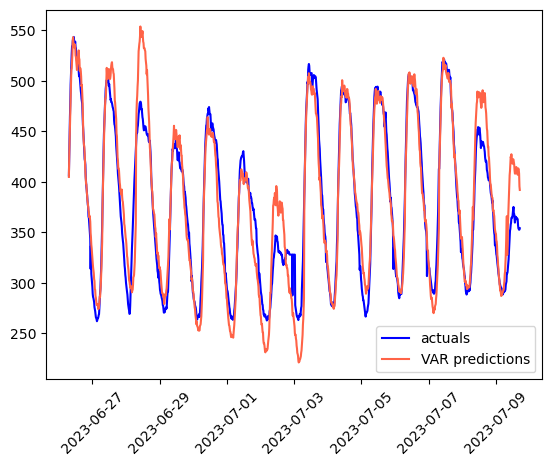

In [78]:
x = utility_data.iloc[-actuals.shape[0]:].event_timestamp
y1 = actuals
y2 = predictions[:actuals.shape[0]]
plt.plot(x,y1,color='b',label='actuals')
plt.plot(x,y2,color='tomato',label='VAR predictions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [79]:
# Model evaluation
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print('MAPE: {:.2%}'.format(mape(y1, y2)))
print('RMSE: {:.4f}'.format(np.sqrt(mse(y1,y2))))
print('MAE: {:.4f}'.format(mae(y1,y2)))

MAPE: 5.49%
RMSE: 26.4600
MAE: 19.7209
